In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer 
qt=QuantileTransformer(output_distribution='normal')

In [2]:
df=pd.read_csv("Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [3]:
df.isnull().sum()

Moderate Positive Skew    0
Highly Positive Skew      0
Moderate Negative Skew    0
Highly Negative Skew      0
dtype: int64

In [4]:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      1.271249
Moderate Negative Skew   -0.690244
Highly Negative Skew     -1.201891
dtype: float64

In [5]:
dfmp=pd.DataFrame()

In [6]:
dfmp["Moderate Positive Skew"]=df["Moderate Positive Skew"]

In [7]:
dfmp["MPS_log"]=np.log(df["Moderate Positive Skew"]) 
dfmp["MPS_rp"]=np.reciprocal(df["Moderate Positive Skew"])
dfmp["MPS_sqr"]=np.sqrt(df["Moderate Positive Skew"])

In [8]:
dfmp["MPS_yj"], parameters=stats.yeojohnson(df["Moderate Positive Skew"])
dfmp["MPS_bc"], parameters=stats.boxcox(df["Highly Positive Skew"]) 
#quantile transformation
dfmp["MPS_qt"]=qt.fit_transform(df[["Moderate Positive Skew"]])
dfmp.skew()

Moderate Positive Skew    0.656308
MPS_log                  -0.392229
MPS_rp                    2.029045
MPS_sqr                   0.152479
MPS_yj                   -0.001168
MPS_bc                    0.023089
MPS_qt                    0.000895
dtype: float64

In [9]:
dfmp.drop('MPS_rp',axis=1,inplace=True)
dfmp.skew()
dfmp

,Moderate Positive Skew,MPS_log,MPS_sqr,MPS_yj,MPS_bc,MPS_qt
0,0.899990,-0.105371,0.948678,0.690865,0.812909,-5.199338
1,1.113554,0.107557,1.055251,0.815560,0.825921,-3.392734
2,1.156830,0.145684,1.075560,0.839629,0.826679,-3.341853
3,1.264131,0.234385,1.124336,0.897735,0.833058,-3.243698
4,1.323914,0.280593,1.150615,0.929191,0.835247,-3.200142
...,...,...,...,...,...,...
9995,14.749050,2.691179,3.840449,3.828849,1.457701,3.203464
9996,14.854474,2.698301,3.854150,3.841318,1.459189,3.225052
9997,15.262103,2.725373,3.906674,3.888934,1.468681,3.326574
9998,15.269983,2.725889,3.907683,3.889845,1.475357,3.328914


In [11]:
#for Highly Positive Skew
#function transformation
dfhp=pd.DataFrame()
dfhp["Highly Positive Skew"]=df["Highly Positive Skew"]
dfhp["HPS_log"]=np.log(df["Highly Positive Skew"]) 
dfhp["HPS_rp"]=np.reciprocal(df["Highly Positive Skew"])
dfhp["HPS_sqr"]=np.sqrt(df["Highly Positive Skew"])
#power transformation
dfhp["HPS_yj"], parameters=stats.yeojohnson(df["Highly Positive Skew"])
dfhp["HPS_bc"], parameters=stats.boxcox(df["Highly Positive Skew"]) 
#quantile transformation
dfhp["HPS_qt"]=qt.fit_transform(df[["Highly Positive Skew"]])
dfhp.skew()

Highly Positive Skew    1.271249
HPS_log                 0.398780
HPS_rp                  0.283884
HPS_sqr                 0.800174
HPS_yj                  0.031338
HPS_bc                  0.023089
HPS_qt                 -0.000408
dtype: float64

In [12]:
dfhp.drop('HPS_sqr',axis=1,inplace=True)
dfhp.skew()

Highly Positive Skew    1.271249
HPS_log                 0.398780
HPS_rp                  0.283884
HPS_yj                  0.031338
HPS_bc                  0.023089
HPS_qt                 -0.000408
dtype: float64

In [13]:
dfhp

,Highly Positive Skew,HPS_log,HPS_rp,HPS_yj,HPS_bc,HPS_qt
0,2.895074,1.063011,0.345414,0.839656,0.812909,-5.199338
1,2.962385,1.085995,0.337566,0.845576,0.825921,-3.342974
2,2.966378,1.087342,0.337112,0.845921,0.826679,-3.326950
3,3.000324,1.098720,0.333297,0.848834,0.833058,-3.216858
4,3.012109,1.102640,0.331993,0.849835,0.835247,-3.186281
...,...,...,...,...,...,...
9995,16.289513,2.790522,0.061389,1.146703,1.457701,3.198360
9996,16.396252,2.797053,0.060990,1.147374,1.459189,3.216327
9997,17.102991,2.839253,0.058469,1.151638,1.468681,3.372712
9998,17.628467,2.869515,0.056726,1.154622,1.475357,3.588705


In [14]:
#for Moderate Negative Skew
dfmn=pd.DataFrame()
#function transformation
dfmn["Moderate Negative Skew"]=df["Moderate Negative Skew"]
dfmn["MNS_rp"]=np.reciprocal(df["Moderate Negative Skew"])
dfmn["MNS_sq"]=np.square(df["Moderate Negative Skew"])
#power transformation
dfmn["MNS_yj"], parameters=stats.yeojohnson(df["Moderate Negative Skew"]) 
#quantile transformation
dfmn["MNS_qt"]=qt.fit_transform(df[["Moderate Negative Skew"]])
dfmn.skew()

Moderate Negative Skew    -0.690244
MNS_rp                   -16.162250
MNS_sq                     0.347926
MNS_yj                    -0.119651
MNS_qt                    -0.001436
dtype: float64

In [15]:
dfmn.drop('MNS_rp',axis=1,inplace=True)
dfmn.skew()

Moderate Negative Skew   -0.690244
MNS_sq                    0.347926
MNS_yj                   -0.119651
MNS_qt                   -0.001436
dtype: float64

In [16]:
dfmn

,Moderate Negative Skew,MNS_sq,MNS_yj,MNS_qt
0,11.180748,125.009116,29.137805,5.199338
1,10.842938,117.569305,27.885272,3.227288
2,10.817934,117.027691,27.793301,3.206801
3,10.764570,115.875961,27.597360,3.167111
4,10.753117,115.629522,27.555368,3.159208
...,...,...,...,...
9995,-2.980821,8.885297,-1.949345,-3.147619
9996,-3.147526,9.906918,-2.028952,-3.162489
9997,-3.517256,12.371089,-2.199693,-3.198205
9998,-4.689833,21.994536,-2.697151,-3.350199


In [17]:
#for Highly Negative Skew
dfhn=pd.DataFrame()
#function transformation
dfhn["Highly Negative Skew"]=df["Highly Negative Skew"]
dfhn["HNS_rp"]=np.reciprocal(df["Highly Negative Skew"])
dfhn["HNS_sq"]=np.square(df["Highly Negative Skew"])
#phwer transformation
dfhn["HNS_yj"], parameters=stats.yeojohnson(df["Highly Negative Skew"]) 
#quantile transformation
dfhn["HNS_qt"]=qt.fit_transform(df[["Highly Negative Skew"]])
dfhn.skew()

Highly Negative Skew   -1.201891
HNS_rp                 -2.136295
HNS_sq                 -0.156984
HNS_yj                 -0.274676
HNS_qt                  0.003126
dtype: float64

In [18]:
dfhn.drop('HNS_rp',axis=1,inplace=True)
dfhn.skew()

Highly Negative Skew   -1.201891
HNS_sq                 -0.156984
HNS_yj                 -0.274676
HNS_qt                  0.003126
dtype: float64

In [19]:
dfhn

,Highly Negative Skew,HNS_sq,HNS_yj,HNS_qt
0,9.027485,81.495480,51.081487,5.199338
1,9.009762,81.175811,50.898041,3.503580
2,9.006134,81.110452,50.860530,3.453669
3,9.000125,81.002257,50.798432,3.386210
4,8.981296,80.663680,50.604084,3.239746
...,...,...,...,...
9995,-3.254882,10.594259,-1.433326,-3.131880
9996,-3.772332,14.230487,-1.545673,-3.174835
9997,-4.717950,22.259048,-1.722267,-3.272809
9998,-5.670496,32.154520,-1.872430,-3.419532


<AxesSubplot:>

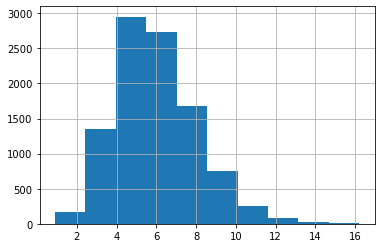

In [20]:
#graphical representation
#for Moderate Positive Skew
df["Moderate Positive Skew"].hist()

<AxesSubplot:>

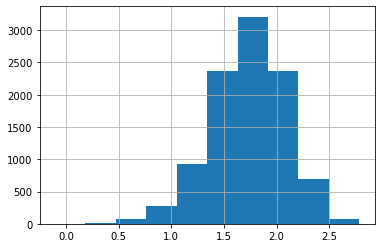

In [21]:
dfmp["MPS_log"].hist()

<AxesSubplot:>

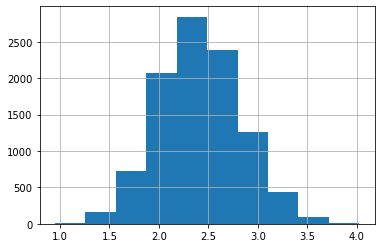

In [22]:
dfmp["MPS_sqr"].hist()

<AxesSubplot:>

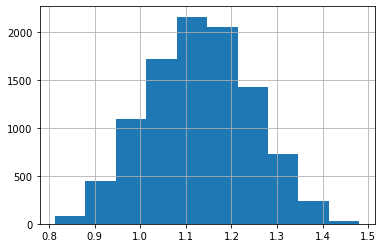

In [23]:
dfmp["MPS_bc"].hist()

<AxesSubplot:>

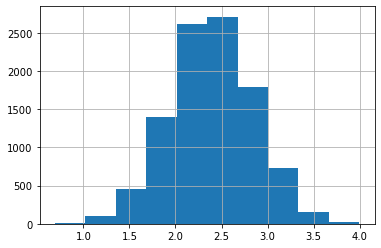

In [24]:
dfmp["MPS_yj"].hist()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


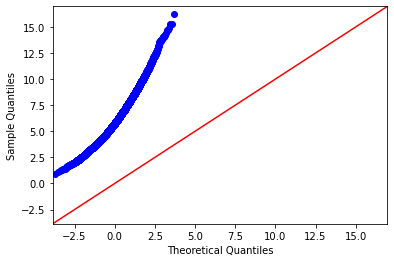

In [25]:
sm.qqplot(df['Moderate Positive Skew'],line='45')
plt.show()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


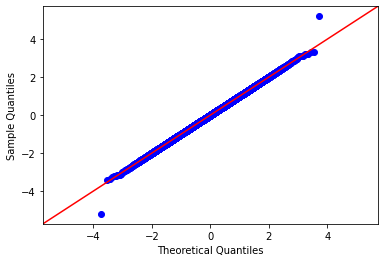

In [26]:
sm.qqplot(dfmp['MPS_qt'],line='45')
plt.show()

<AxesSubplot:>

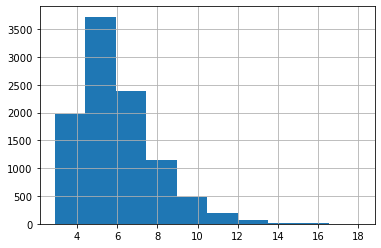

In [27]:
#for Highly Positive Skew
df["Highly Positive Skew"].hist()

<AxesSubplot:>

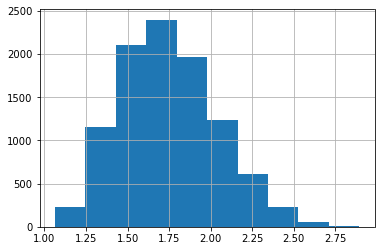

In [28]:
dfhp["HPS_log"].hist()

<AxesSubplot:>

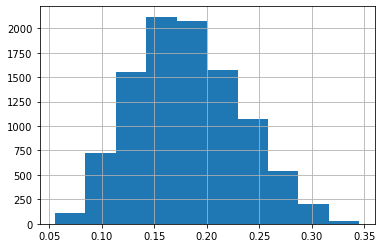

In [29]:
dfhp["HPS_rp"].hist()

<AxesSubplot:>

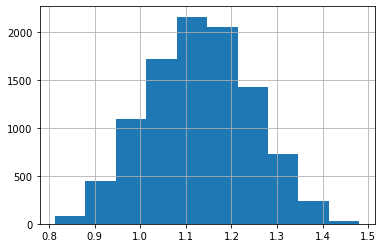

In [30]:
dfhp["HPS_bc"].hist()

<AxesSubplot:>

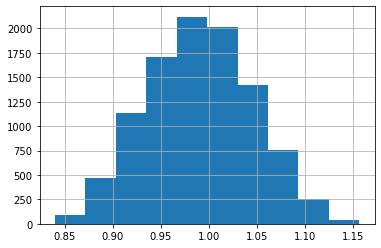

In [31]:
dfhp["HPS_yj"].hist()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


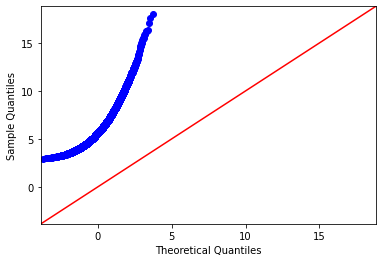

In [32]:
sm.qqplot(df['Highly Positive Skew'],line='45')
plt.show()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


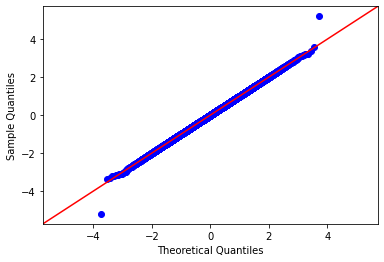

In [33]:
sm.qqplot(dfhp['HPS_qt'],line='45')
plt.show()

<AxesSubplot:>

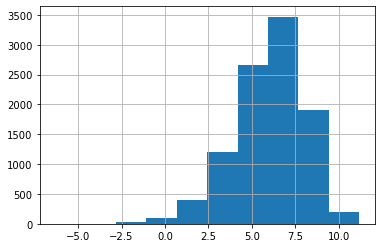

In [34]:
#for Moderate Negative Skew
df["Moderate Negative Skew"].hist()

<AxesSubplot:>

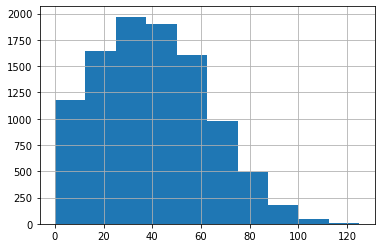

In [35]:
dfmn["MNS_sq"].hist()

<AxesSubplot:>

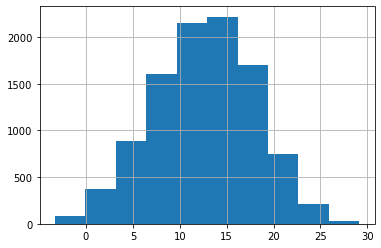

In [36]:
dfmn["MNS_yj"].hist()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


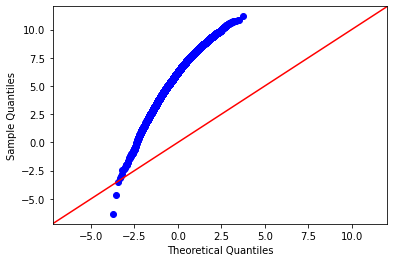

In [37]:
sm.qqplot(df['Moderate Negative Skew'],line='45')
plt.show()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


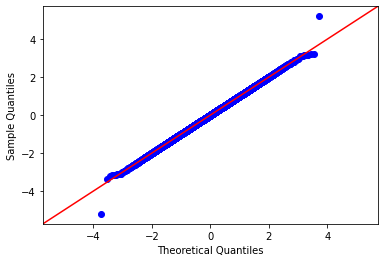

In [38]:
sm.qqplot(dfmn['MNS_qt'],line='45')
plt.show()

<AxesSubplot:>

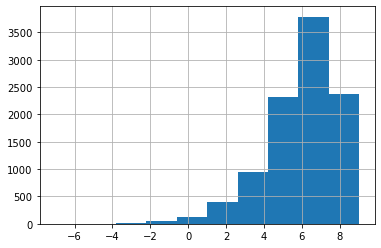

In [39]:
#for Highly Negative Skew
df["Highly Negative Skew"].hist()

<AxesSubplot:>

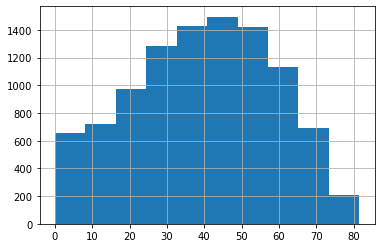

In [40]:
dfhn["HNS_sq"].hist()

<AxesSubplot:>

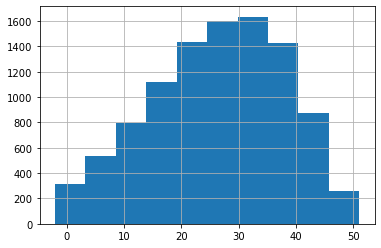

In [41]:
dfhn["HNS_yj"].hist()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


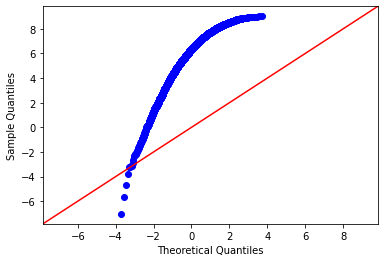

In [42]:
sm.qqplot(df['Highly Negative Skew'],line='45')
plt.show()


C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


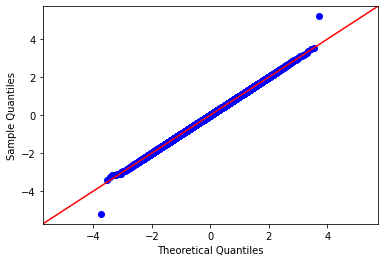

In [43]:
sm.qqplot(dfhn['HNS_qt'],line='45')
plt.show()
